## Final Project
<b>Larremy Gray<br>
Brainstation Data Science Course<br> </b>
 6/13/21 - 7/18/21

##### Project Overview
The project's goal is to use regression techniques to model and predict home sale prices in the Ames Housing Dataset. This is a Kaggle competition project. An overview of the project can be found https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview.

In [1]:
# Importing modules to be used later in the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, metrics
from sklearn.ensemble import GradientBoostingRegressor

##### Dataset
The dataset is also available on the kaggle.com website (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) as a set of flat files

In [2]:
# Import Data
df = pd.read_csv('train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### Hypothesis
There is enough data available in the dataset to build a model capable of predicting house sale prices within the given timeframe and region. In particular, I think that month and year, and neighborhood will be reliable predictors.<p> The null hypothesis is that a model cannot be created as the data is completely random.</p>

###### Data Cleansing
There were no significant issues with the data identified. The data cleansing component consisted of checking for duplicates and removing the index column because one was found in the data.

In [3]:
# Check for duplicated rows
df[df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [4]:
# Check for duplicated columns
df[df.index.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [5]:
# Removing the index column
df = pd.read_csv('train.csv',index_col=0)
df.index.names = [None]
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### Data Preprocessing
I added an additional column to later consider the month and year of the sale.

In [6]:
# Creating a helper column that represents the number of months since the earliest month 
# (January 2006) to regress
df['SYDate'] = (df['YrSold'] - 2006)*12 + df['MoSold']

In [7]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SYDate
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,26
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,17
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,33
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,36


##### Data Exploration
This section just shows attempts to understand the data and find any points to initiate further analysis.

In [8]:
# Descriptive Summary of the quantitative factors in the the data
df.describe(include= ['int64','float64'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SYDate
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,28.110959
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,15.771632
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,1.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,16.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,29.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,42.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,55.000000


In [9]:
# Descriptive Summary of the qualitative/categorical factors in the data
df.describe(exclude = ['int64','float64'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


This histogram captures the distribution of the prices

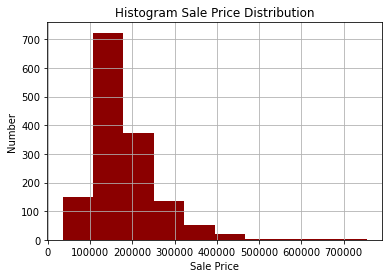

In [10]:
df.loc[:,'SalePrice'].hist(color = 'darkred')
plt.xlabel('Sale Price')
plt.ylabel('Number')
plt.title('Histogram Sale Price Distribution')
plt.show()

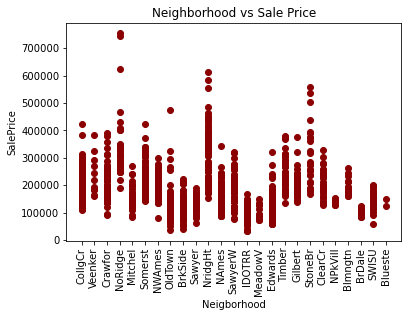

In [11]:
plt.figure()
plt.xticks(rotation=90)
plt.ylabel('SalePrice')
plt.xlabel('Neigborhood')
plt.title('Neighborhood vs Sale Price')
plt.scatter(df['Neighborhood'],df['SalePrice'],color='darkred')
plt.show()

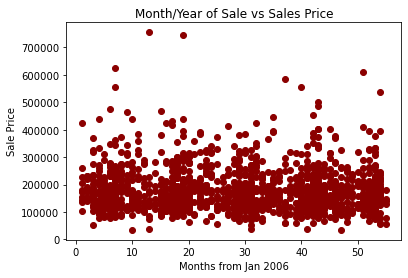

In [12]:
plt.figure()
plt.xlabel('Months from Jan 2006')
plt.ylabel('Sale Price')
plt.scatter(df['SYDate'],df['SalePrice'],color='darkred')
plt.title('Month/Year of Sale vs Sales Price')
plt.show()

In [13]:
print(df.corr().loc['SalePrice','MSSubClass':'SYDate'])

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
SYDate          -0.021267
Name: SalePr

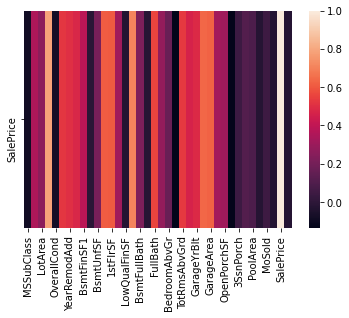

In [14]:
# Heatmap used to find correlation to the dependent variable SalePrice
sns.set_palette("RdGy")
sns.heatmap(df.corr().loc['SalePrice':'SalePrice','MSSubClass':'SYDate'])
plt.show()

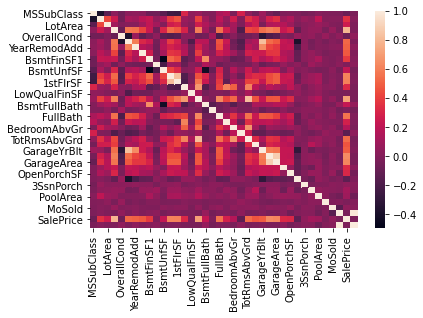

In [15]:
# Heatmap for the entire data set (too many factors!)
sns.heatmap(df.corr())
plt.show()

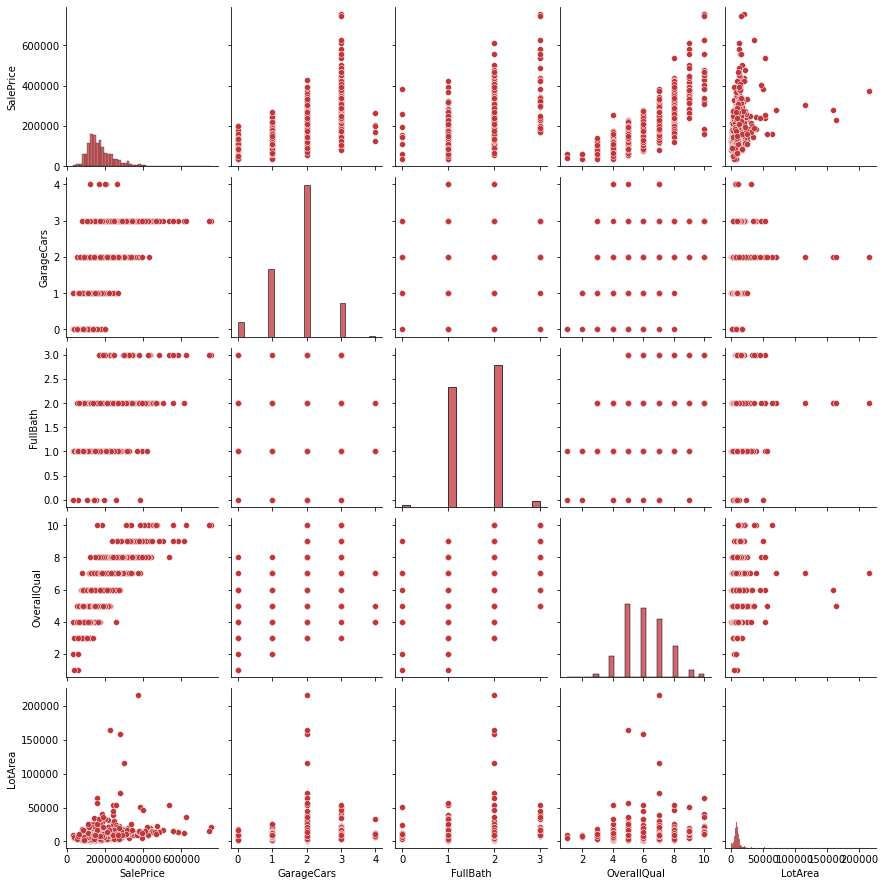

In [16]:
sns.pairplot(df.loc[:,['SalePrice','GarageCars','FullBath','OverallQual','LotArea']])
plt.show()

##### Numerical Model
I used the statsmodels package to create a linear regression using the calculated helper column SYDate, the implied dummy/categorical factors around neighborhood, and selected physical qualities that seemed to be heavily correlated with saleprice. This model had an R-squared of .817 which suggests that the model can explain over 81% of the variance in sale prices <br><br>Some of the coefficients for the neighborhood were insignficant, but I attribute that to there not being as much a difference between <i>all</i> neighborhoods. In other words Blmngtn was used as the base for the regression, and low quality coeffcients in the model may indicate that other neighborhoods are fundamentally similar to Blmngtn.

In [17]:
model1 = smf.ols("SalePrice ~ LotArea + OverallQual + YearBuilt + YearRemodAdd + TotalBsmtSF + GrLivArea + \
              GarageCars + SYDate + Neighborhood",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     199.1
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:07:11   Log-Likelihood:                -17304.
No. Observations:                1460   AIC:                         3.467e+04
Df Residuals:                    1427   BIC:                         3.485e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1.052e+06   1.61e+05     -6.527      0.000   -1.37e+06   -7.36e+05
Neighborhood[T.Blueste] -5002.8963   2.58e+04     -0.194      0.846   -5.56e+04    4.56e+04
Neighborhood[T.BrDale]  -7020.7452   1.24e+04     -0.568      0.570   -3.13e+04    1.72e+04
Neighborhood[T.BrkSide]   2.22e+04   1.07e+04      2.083      0.037    1296.999    4.31e+04
Neighborhood[T.ClearCr]  2.777e+04   1.12e+04      2.473      0.013    5745.807    4.98e+04
Neighborhood[T.CollgCr]  1.622e+04   8866.849      1.830      0.068   -1170.821    3.36e+04
Neighborhood[T.Crawfor]  4.352e+04   1.05e+04      4.144      0.000    2.29e+04    6.41e+04
Neighborhood[T.Edwards]  7377.7960   9732.286      0.758      0.449   -1.17e+04    2.65e+04
Neighborhood[T.Gilbert]  9348.0751   9368.962      0.998      0.319   -9030.342    2.77e+04
Neighborhood[T.IDOTRR]   8728.9202   1.13e+04      0.771      0.441   -1.35e+04    3.09e+04
Neighborhood[T.MeadowV]  9587.4704   1.23e+04      0.781      0.435   -1.45e+04    3.37e+04
Neighborhood[T.Mitchel]  9016.4369   9912.878      0.910      0.363   -1.04e+04    2.85e+04
Neighborhood[T.NAmes]    1.574e+04   9259.562      1.700      0.089   -2422.171    3.39e+04
Neighborhood[T.NPkVill]  1178.4245   1.44e+04      0.082      0.935    -2.7e+04    2.94e+04
Neighborhood[T.NWAmes]   9365.9722   9560.232      0.980      0.327   -9387.645    2.81e+04
Neighborhood[T.NoRidge]  7.117e+04   1.02e+04      6.962      0.000    5.11e+04    9.12e+04
Neighborhood[T.NridgHt]  6.838e+04   9308.446      7.346      0.000    5.01e+04    8.66e+04
Neighborhood[T.OldTown]  2992.1700   1.04e+04      0.288      0.773   -1.74e+04    2.34e+04
Neighborhood[T.SWISU]    7743.7204   1.21e+04      0.640      0.522    -1.6e+04    3.15e+04
Neighborhood[T.Sawyer]   1.496e+04   9774.536      1.531      0.126   -4211.768    3.41e+04
Neighborhood[T.SawyerW]  1.266e+04   9640.006      1.313      0.189   -6253.799    3.16e+04
Neighborhood[T.Somerst]  2.288e+04   9171.190      2.494      0.013    4884.574    4.09e+04
Neighborhood[T.StoneBr]  7.442e+04   1.09e+04      6.821      0.000     5.3e+04    9.58e+04
Neighborhood[T.Timber]   2.603e+04   1.03e+04      2.534      0.011    5880.980    4.62e+04
Neighborhood[T.Veenker]  5.073e+04   1.34e+04      3.776      0.000    2.44e+04    7.71e+04
LotArea                     0.6220      0.104      5.952      0.000       0.417       0.827
OverallQual              1.538e+04   1171.821     13.129      0.000    1.31e+04    1.77e+04
YearBuilt                 201.8599     70.481      2.864      0.004      63.602     340.118
YearRemodAdd              303.8794     60.080      5.058      0.000     186.025     421.734
TotalBsmtSF                20.8472      2.744      7.598      0.000      15.465      26.230
GrLivArea                  45.2764      2.503  

##### Model Validation

In [18]:
# Creating prediction column
df['Predict']= model1.predict(df)

In [19]:
# Isolate SalePrice and Predicted Sale Price
df.loc[:,['SalePrice','Predict']].head(10)

,SalePrice,Predict
1,208500,209031.663247
2,181500,203512.298693
3,223500,214746.272563
4,140000,219590.841358
5,250000,321252.330926
6,143000,152853.425415
7,307000,249554.191318
8,200000,210358.370223
9,129900,168584.414465
10,118000,116931.513677


In [20]:
# Summary Model Test
MSE = round(metrics.mean_squared_error(df['SalePrice'],df['Predict']),2)
MAE = round(metrics.mean_absolute_error(df['SalePrice'],df['Predict']),2)
RSQ = round(metrics.r2_score(df['SalePrice'],df['Predict']),2)
print (f" The MSE is {MSE}\n The MAE is {MAE}\n The R-Squared is {RSQ}")

 The MSE is 1154160824.41
 The MAE is 20845.14
 The R-Squared is 0.82


##### Explanatory Summary Visual
The  plot below shows the relationship between the reported and predicted data.

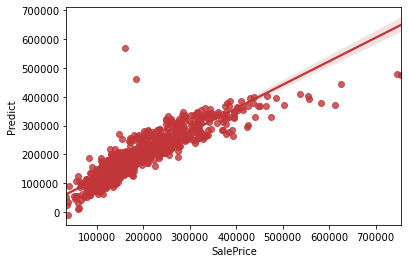

In [21]:
sns.regplot(x=df['SalePrice'],y=df['Predict'],data=df)
plt.show()

Here I am trying to drill down on some of these outliers. The summary here is that all of the cases where the difference between the expected and actual values are greather than 200000 occur in just three neighborhoods. The model may not be as strong a predictor in these neighborhoods. This could be due to a more socio-economically diverse neighborhood when compared to the others. This is somewhat supported by these neighborhoods appearing to have a larger range of saleprice values as observed in the 'Neighborhood vs Salesprice' graph under data exploration.

In [22]:
# Create sections of data for further analysis
df['Error'] = abs(df['Predict']-df['SalePrice'])
dfx = df.loc[:,['Neighborhood','SalePrice','Predict','Error','SaleCondition','SaleType']]
dfx[dfx['Error']>200000]

,Neighborhood,SalePrice,Predict,Error,SaleCondition,SaleType
524,Edwards,184750,462074.349283,277324.349283,Partial,New
692,NoRidge,755000,477102.161409,277897.838591,Normal,WD
804,NridgHt,582933,378488.438154,204444.561846,Partial,New
899,NridgHt,611657,369888.727618,241768.272382,Partial,New
1183,NoRidge,745000,480294.990823,264705.009177,Abnorml,WD
1299,Edwards,160000,570921.372890,410921.372890,Partial,New


Below are residual plots for these specific neighborhoods.

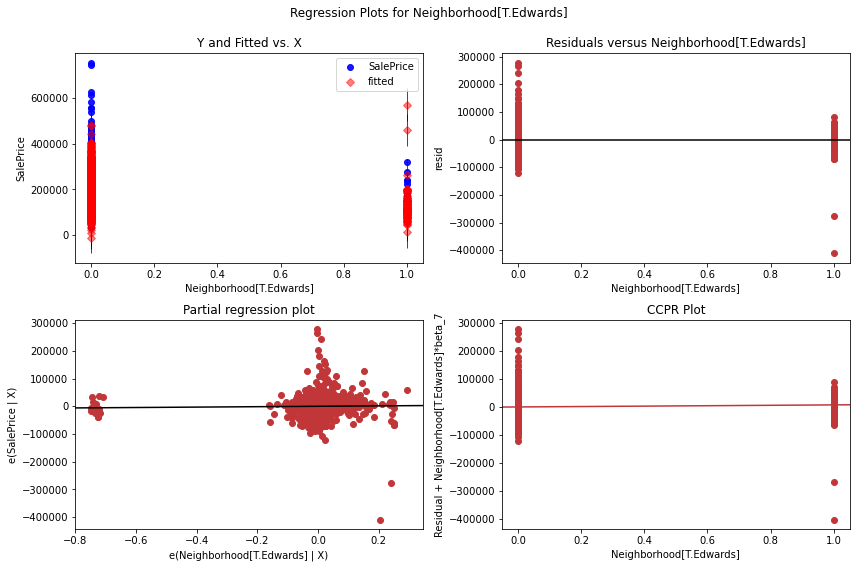

In [23]:
# define figure size
fig = plt.figure(figsize=(12,8))
#create regression plots
fig = sm.graphics.plot_regress_exog(model1,'Neighborhood[T.Edwards]',fig=fig)

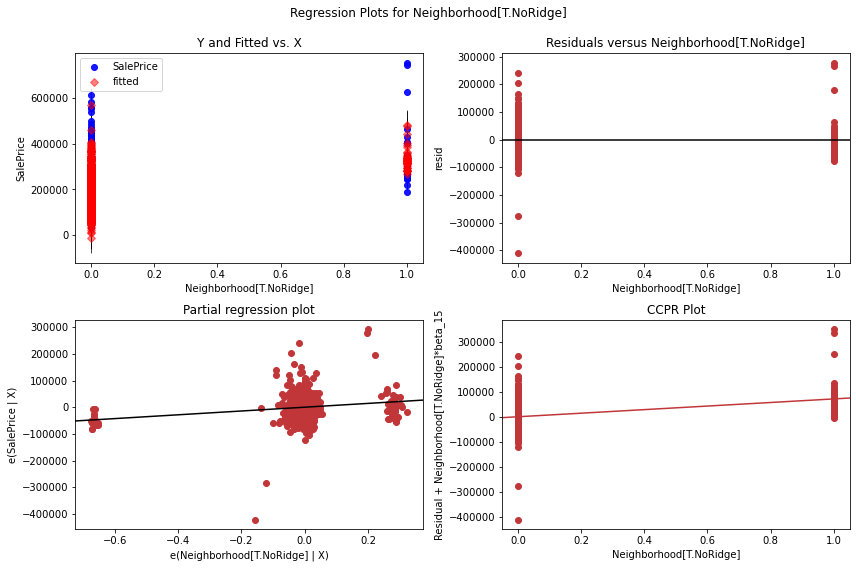

In [24]:
# define figure size
fig1 = plt.figure(figsize=(12,8))
#create regression plots
fig1 = sm.graphics.plot_regress_exog(model1,'Neighborhood[T.NoRidge]',fig=fig1)

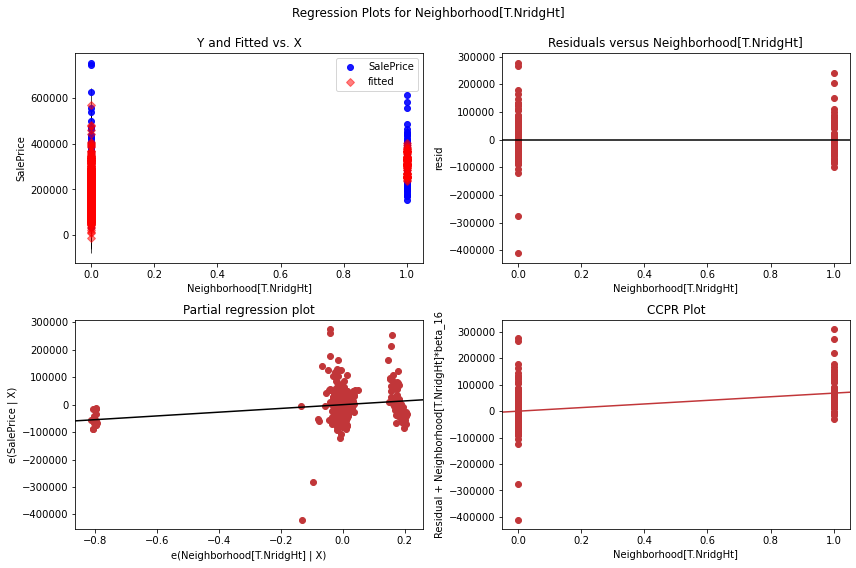

In [25]:
# define figure size
fig2 = plt.figure(figsize=(12,8))
#create regression plots
fig2 = sm.graphics.plot_regress_exog(model1,'Neighborhood[T.NridgHt]',fig=fig2)

The linear model was pretty good, but I am now curious if I can create a more accurate model using gradient boosted regression.<br><br><b>Data Preprocessing for Gradient Boosted Regression</b><br>Here I am consolidating the chosen attributes into a new dataframe to apply a gradient boosted regression.

In [26]:
df2 = df.loc[:,['LotArea','OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','GrLivArea','GarageCars', \
                 'Neighborhood','SYDate']]
df2 = pd.get_dummies(df2, columns=['Neighborhood'])
df2['SalePrice'] = df['SalePrice']
# Drop Blmngtn for Regression
df2.drop('Neighborhood_Blmngtn',axis =1,inplace=True)
df2.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,SYDate,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SalePrice
1,8450,7,2003,2003,856,1710,2,26,0,0,...,0,0,0,0,0,0,0,0,0,208500
2,9600,6,1976,1976,1262,1262,2,17,0,0,...,0,0,0,0,0,0,0,0,1,181500
3,11250,7,2001,2002,920,1786,2,33,0,0,...,0,0,0,0,0,0,0,0,0,223500
4,9550,7,1915,1970,756,1717,3,2,0,0,...,0,0,0,0,0,0,0,0,0,140000
5,14260,8,2000,2000,1145,2198,3,36,0,0,...,0,0,0,0,0,0,0,0,0,250000


<b> Numerical Model for Gradient Boosted Regression</b><br> Here I apply a simple scikit-learn Gradient Boosting Regression with max depth set to the standard 3 to see if I can create a better model. The results are appended to the dataframe df2.

In [27]:
gbrt=GradientBoostingRegressor(n_estimators=100, max_depth=3)
gbrt.fit(df2.loc[:,'LotArea':'Neighborhood_Veenker'],df2.loc[:,'SalePrice'])
df2['Predict'] =gbrt.predict(df2.loc[:,'LotArea':'Neighborhood_Veenker'])
df2.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,SYDate,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SalePrice,Predict
1,8450,7,2003,2003,856,1710,2,26,0,0,...,0,0,0,0,0,0,0,0,208500,192834.886210
2,9600,6,1976,1976,1262,1262,2,17,0,0,...,0,0,0,0,0,0,0,1,181500,167406.797966
3,11250,7,2001,2002,920,1786,2,33,0,0,...,0,0,0,0,0,0,0,0,223500,203357.953793
4,9550,7,1915,1970,756,1717,3,2,0,0,...,0,0,0,0,0,0,0,0,140000,173061.717054
5,14260,8,2000,2000,1145,2198,3,36,0,0,...,0,0,0,0,0,0,0,0,250000,287242.303222


<b>Model Validation for Gradient Boosted Regression</b><br>The validation summary is below. The model seems to fit better, with the R-Squared value increasing to .94, suggesting that this model predict more variability in the sale sprices using the same factors.The MSE and MAE are also reduced.

In [28]:
# Summary Model2 (Gradient Boosted) Test
MSE = round(metrics.mean_squared_error(df2['SalePrice'],df2['Predict']),2)
MAE = round(metrics.mean_absolute_error(df2['SalePrice'],df2['Predict']),2)
RSQ = round(metrics.r2_score(df2['SalePrice'],df2['Predict']),2)
print (f" The MSE is {MSE}\n The MAE is {MAE}\n The R-Squared is {RSQ}")

 The MSE is 357140819.71
 The MAE is 13726.26
 The R-Squared is 0.94


Below we can see importance of each of the features. The most important neighborhood is Edwarsds, but the most important feature for the model is Overrall Quality (OverallQual).

In [29]:
# Check out feature importance
ftimp = {'Feature Importance': gbrt.feature_importances_ ,'Feature':list(df2.loc[:,'LotArea':'Neighborhood_Veenker']                                                                             )}
dffi = pd.DataFrame (ftimp, columns = ['Feature','Feature Importance'])
dffi



,Feature,Feature Importance
0,LotArea,0.030235
1,OverallQual,0.557146
2,YearBuilt,0.027805
3,YearRemodAdd,0.035451
4,TotalBsmtSF,0.109550
5,GrLivArea,0.158632
6,GarageCars,0.052936
7,SYDate,0.002640
8,Neighborhood_Blueste,0.000000
9,Neighborhood_BrDale,0.000000


##### Explanatory Summary Visual for Gradient Boosted Regression
The  plot below shows the relationship between the reported and predicted data using the gradient boosted regression technique. As expected per the test results, there is a better fit. Compared to the standard linear regression, this model had fewer outliers.

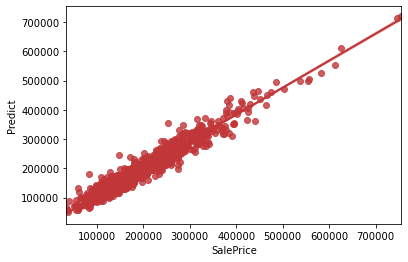

In [30]:
# Summary Model2 Test
sns.regplot(x=df2['SalePrice'],y=df2['Predict'],data=df2)
plt.show()

##### Insights
The vanilla linear regression model was good, but the gradient boosted regression model was better!<br><br>Neighborhood was fairly effective when used in conjuction with the housing physical attributes to explain some of the pricing variance. This datapoint likely implies other attibutes (income, general quality of the area, school district, crime rate, etc) that would affect the sale price of a home. <br><br>I was suprised that there wasn't a significant effect observed between the month and year of sale and the price. I would expect that this would capture general economic influences (state of economy, borrowing rate) that would affect pricing. The US experienced a housing bubble collapse in the time frame of the data, but this was not espeically evident in this analysis.

<b>*</b> <i>7/19/21 Revision to original submission includes cleaner use of dummy variables and commentary.<br><b>*</b> 7/20/21 Revision to original submission includes application of gradient boosting.</i>